# DA MODULE 3: Data transformation. 

## Evaluation exercises

### Data provided:

#### - Customer flight Activity.csv

#### - Customer Loyalty History.csv

#### PHASE 1: Exploración y limpieza

1. Exploración inicial:

- Exploración inicial de los datos para identificar posibles problemas como valores nulos, atípicos o faltantes en las columnas relevantes

- Utiliza funciones de Pandas para obtener información sobre la estructura de los datos y las estadísticas básicas de las columnas involucradas


In [1]:
# Importing relevant libraries

# Data transformation
import numpy as np
import pandas as pd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# statistic tests
import scipy.stats as stats
from scipy.stats import shapiro, kstest, ttest_ind, mannwhitneyu, expon, chisquare

#configuration (to be able to watch all columns in the dataframes)
pd.set_option("display.max_columns", None)

# warnings management
import warnings
warnings.filterwarnings("ignore")

In [8]:
# import the first file Customer flight Activity.csv
# This file contains information about the flight activity of customers, flight booked, total flight distance, 
# points accumulated and so forth

df_flight = pd.read_csv("Customer flight Activity.csv")
df_flight.head(2)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0


In [2]:
# import the second file Customer Loyalty History.csv
# This file contains information about the clients

df_customer = pd.read_csv("Customer Loyalty History.csv")
df_customer.head(2)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN


In [114]:
#Shapes of the dataframes

print(f'Customer flight activity.csv has {df_flight.shape[0]} rows and {df_flight.shape[1]} columns')

print(f'Customer Loyalty History.csv has {df_customer.shape[0]} rows and {df_customer.shape[1]} columns')

Customer flight activity.csv has 405624 rows and 10 columns
Customer Loyalty History.csv has 16737 rows and 16 columns


In [9]:
# Explore duplicate records

df_flight.duplicated().sum()

# There are 1864 duplicated rows in this dataframe. Since each row in this dataset indicates a "transaction" with 
# the customer, which should be unique, I am opting for dropping the duplicates. 
# Nevertheless, data w/o duplicates will be saved in a new df, rather than overwriting the df with duplicates

1864

In [10]:
# drop duplicates

df_flight_no_dup = df_flight.drop_duplicates()

print(f'Number of duplicates in df_flight_no_dup is {df_flight_no_dup.duplicated().sum()}')

# all duplicates have been dropped

Number of duplicates in df_flight_no_dup is 0


In [3]:
df_customer.duplicated().sum()

# The customer df does not have any duplicated row

0

In [47]:
df_flight["Loyalty Number"].value_counts()

# Number of unique values is 1637, same as the number of customers in the customer df. That is, each customer has
# many transactions registered in the flights df

678205    72
989528    48
373638    48
684889    48
684881    48
          ..
428526    24
428536    24
428565    24
428590    24
999891    24
Name: Loyalty Number, Length: 16737, dtype: int64

In [4]:
df_customer["Loyalty Number"].value_counts()

# Loyalty numbers in this df are unique

480934    1
208485    1
455896    1
469781    1
533488    1
         ..
922188    1
780529    1
721438    1
761015    1
652627    1
Name: Loyalty Number, Length: 16737, dtype: int64

In [48]:
df_flight.info()

# All variables in df_flight are numeric, all integer, except "Points Accumulated" which is in float format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


In [116]:
# Main (numeric) descriptives of flights

round(df_flight.describe(),1)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
count,405624.0,405624.0,405624.0,405624.0,405624.0,405624.0,405624.0,405624.0,405624.0,405624.0
mean,550037.9,2017.5,6.5,4.1,1.0,5.1,1208.9,123.7,30.7,2.5
std,258935.3,0.5,3.5,5.2,2.1,6.5,1433.2,146.6,125.5,10.2
min,100018.0,2017.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,326961.0,2017.0,3.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,550834.0,2017.5,6.5,1.0,0.0,1.0,488.0,50.0,0.0,0.0
75%,772194.0,2018.0,9.2,8.0,1.0,10.0,2336.0,239.0,0.0,0.0
max,999986.0,2018.0,12.0,21.0,11.0,32.0,6293.0,676.5,876.0,71.0


In [71]:
df_customer.info()

# df_customer has 9 "object" type variables, 3 integers and 4 of type float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

In [5]:
# Main descriptives of numeric variables
round(df_customer.describe(),1)

#NOTE that Salary has negative values, and there are missing values
#There are only 2067 "Cancelation year" entries so most likely only this number of customers has left the rewards program

,Loyalty Number,Salary,CLV,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
count,16737.0,12499.0,16737.0,16737.0,16737.0,2067.0,2067.0
mean,549735.9,79245.6,7988.9,2015.3,6.7,2016.5,7.0
std,258912.1,35008.3,6861.0,2.0,3.4,1.4,3.5
min,100018.0,-58486.0,1898.0,2012.0,1.0,2013.0,1.0
25%,326603.0,59246.5,3980.8,2014.0,4.0,2016.0,4.0
50%,550434.0,73455.0,5780.2,2015.0,7.0,2017.0,7.0
75%,772019.0,88517.5,8940.6,2017.0,10.0,2018.0,10.0
max,999986.0,407228.0,83325.4,2018.0,12.0,2018.0,12.0


In [6]:
# Main descriptives of categorical variables
df_customer.describe(include="object").T

,count,unique,top,freq
Country,16737,1,Canada,16737
Province,16737,11,Ontario,5404
City,16737,29,Toronto,3351
Postal Code,16737,55,V6E 3D9,911
Gender,16737,2,Female,8410
Education,16737,5,Bachelor,10475
Marital Status,16737,3,Married,9735
Loyalty Card,16737,3,Star,7637
Enrollment Type,16737,2,Standard,15766


In [7]:
# Investigate categories in each of the categorical variables

df_customer_cat = df_customer.select_dtypes(include="object")

for col in df_customer_cat.columns:
    print(f'For column: {col.upper()}')
    print(f'unique values and their frequencies are: \n{df_customer_cat[col].value_counts()}')
    print("---------------------")


# otra version
#for item in nulos_esta_cat:
#    print(f"La distribución de las categorías para la columna {item.upper()}")
#    display(round(df[item].value_counts()*100 / df.shape[0],2))  # display es una función utilizada para mostrar objetos de manera más legible en Jupyter Notebooks o entornos similares. 
#    print("........................")

For column: COUNTRY
unique values and their frequencies are: 
Canada    16737
Name: Country, dtype: int64
---------------------
For column: PROVINCE
unique values and their frequencies are: 
Ontario                 5404
British Columbia        4409
Quebec                  3300
Alberta                  969
Manitoba                 658
New Brunswick            636
Nova Scotia              518
Saskatchewan             409
Newfoundland             258
Yukon                    110
Prince Edward Island      66
Name: Province, dtype: int64
---------------------
For column: CITY
unique values and their frequencies are: 
Toronto           3351
Vancouver         2582
Montreal          2059
Winnipeg           658
Whistler           582
Halifax            518
Ottawa             509
Trenton            486
Edmonton           486
Quebec City        485
Dawson Creek       444
Fredericton        425
Regina             409
Kingston           401
Tremblant          398
Victoria           389
Hull        

- All customers are located in different provinces/cities of Canada. 
- Number of male and female in the group is similar (8327 and 8410, respectively)
- The most frequent marital status is "married"
- There are 3 types of loyalty cards: Star, Nova and Aurora, with Star being more frequent
- There are 2 enrollment types: Standard and 2018 Promotion

In [11]:
# Unify column names in flight df

columnas = [col.lower().replace(" ", "_") for col in df_flight_no_dup]
df_flight_no_dup.columns = columnas
df_flight_no_dup.head(2)

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0


In [12]:
# Unify column names in customer df

columnas_2 = [col.lower().replace(" ", "_") for col in df_customer]
df_customer.columns = columnas_2
df_customer.head(2)

,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN


In [13]:
# Except CLV which should continue in uppercase

df_customer.rename(columns={"clv":"CLV"}, inplace=True)
df_customer.head(2)

,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,CLV,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN


It seems more appropriate that months are labeled from January to December and not with int numbers.
So let's change that

In [14]:
# create a dictionary to make the substitution
month_dict = {
    1: "January",
    2: "February",
    3: "March",
    4: "April",
    5: "May",
    6: "June",
    7: "July",
    8: "August",
    9: "September",
    10: "October",
    11: "November",
    12: "December"
}

#convert df_flights_no_dup "month" column to object type before substituting
df_flight_no_dup["month"] = df_flight_no_dup["month"].astype(object)

#substitute numbers for month
df_flight_no_dup["month"] = df_flight_no_dup["month"].replace(month_dict)

#check
df_flight_no_dup["month"].unique()

array(['January', 'September', 'February', 'March', 'November', 'April',
       'May', 'July', 'June', 'August', 'October', 'December'],
      dtype=object)

In [15]:
#Let's do the same for "cancelation_month" in the df_customer
# We can use the same dictionary

#convert df_customer "cancellation_month" column to object type before substituting
df_customer["cancellation_month"] = df_customer["cancellation_month"].astype(object)

#substitute numbers for month
df_customer["cancellation_month"] = df_customer["cancellation_month"].replace(month_dict)

#check
df_customer["cancellation_month"].unique()

# All correct


array([nan, 'January', 'December', 'April', 'February', 'July',
       'November', 'May', 'June', 'October', 'August', 'September',
       'March'], dtype=object)

In [16]:
# Also for 'enrollment_month'

#convert df_customer "enrollment_month" column to object type before substituting
df_customer["enrollment_month"] = df_customer["enrollment_month"].astype(object)

#substitute numbers for month
df_customer["enrollment_month"] = df_customer["enrollment_month"].replace(month_dict)

#check
df_customer["enrollment_month"].unique()

# All correct


array(['February', 'March', 'July', 'October', 'May', 'June', 'December',
       'January', 'November', 'August', 'April', 'September'],
      dtype=object)

In [17]:
df_flight_no_dup.head(2)

# All good

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
0,100018,2017,January,3,0,3,1521,152.0,0,0
1,100102,2017,January,10,4,14,2030,203.0,0,0


#### NULL VALUES

In [18]:
# Are there null values in the first dataframe?

print(f'The number of null values per column in the df_flight_no_dup dataframe is:\n{df_flight_no_dup.isna().sum()}')

# No, there are no null values in the flights dataset


The number of null values per column in the df_flight_no_dup dataframe is:
loyalty_number                 0
year                           0
month                          0
flights_booked                 0
flights_with_companions        0
total_flights                  0
distance                       0
points_accumulated             0
points_redeemed                0
dollar_cost_points_redeemed    0
dtype: int64


In [234]:
# Are there null values in the second dataframe?

print(f'The null values per column in the df_customer dataframe are:\n{df_customer.isna().sum()}')

The null values per column in the df_customer dataframe are:
loyalty_number            0
country                   0
province                  0
city                      0
postal_code               0
gender                    0
education                 0
salary                 4258
marital_status            0
loyalty_card              0
CLV                       0
enrollment_type           0
enrollment_year           0
enrollment_month          0
cancellation_year     14670
cancellation_month    14670
dtype: int64


In [235]:
# Columns with null values
print(f'Columns that include null values in df_customer are:')
df_customer.isna().sum()[(df_customer.isna().sum()>0)]

Columns that include null values in df_customer are:


salary                 4258
cancellation_year     14670
cancellation_month    14670
dtype: int64

In [239]:
df_customer["salary"].unique()

array([ 83236.,     nan, 103495., ...,  46971.,  76178.,  91970.])

In [20]:
# identify customers with negative salaries

df_salary_neg= df_customer.loc[(df_customer["salary"]<0),["loyalty_number", "salary"]]
df_salary_neg        
# There are 18 customers with negative salaries.                    

,loyalty_number,salary
1082,542976,-49830.0
1894,959977,-12497.0
2471,232755,-46683.0
3575,525245,-45962.0
3932,603070,-19325.0
4712,491242,-43234.0
6560,115505,-10605.0
6570,430398,-17534.0
7373,152016,-58486.0
8576,194065,-31911.0


So, with respect to "salary", we have 4238 null values and 18 negative values.

First, substitute the negative values with NaN.

Then, substitute all NaNs for an imputed value, after considering which one

1. Convert negative values to NaN

In [21]:
# add negative numbers to a list
list_neg_salary= df_salary_neg["salary"].tolist()
#Convert to a dictionary:
dicc_salary ={key:np.nan for key in list_neg_salary}
dicc_salary

{-49830.0: nan,
 -12497.0: nan,
 -46683.0: nan,
 -45962.0: nan,
 -19325.0: nan,
 -43234.0: nan,
 -10605.0: nan,
 -17534.0: nan,
 -58486.0: nan,
 -31911.0: nan,
 -49001.0: nan,
 -34079.0: nan,
 -9081.0: nan,
 -46470.0: nan,
 -26322.0: nan,
 -47310.0: nan,
 -39503.0: nan,
 -19332.0: nan,
 -46303.0: nan,
 -57297.0: nan}

In [22]:
# Substitute negative values with NaN

df_customer["salary"].replace(dicc_salary, inplace=True)

In [23]:
round(df_customer["salary"].describe(),1)
# Mean and median differ somewhat

count     12479.0
mean      79429.6
std       34727.6
min       15609.0
25%       59265.0
50%       73510.0
75%       88600.5
max      407228.0
Name: salary, dtype: float64

Text(0.5, 1.0, 'Boxplot distribution of salaries')

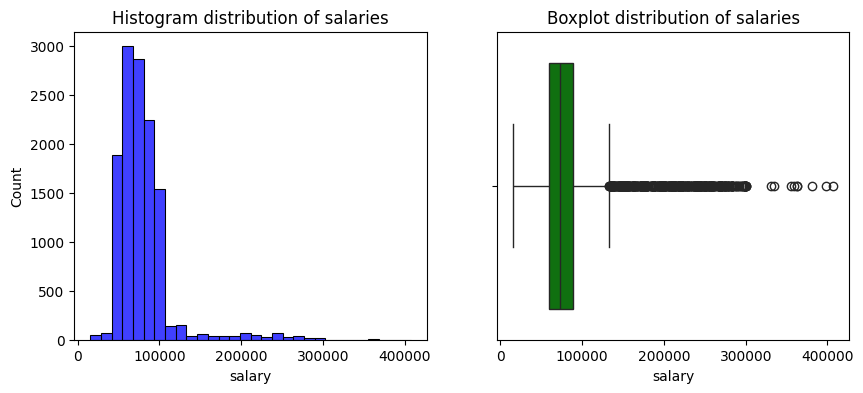

In [24]:
# Let's check salary data distribution after removal of negative values

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

sns.histplot(data=df_customer, x="salary", bins=30, color="blue", ax=axes[0])
sns.boxplot(data=df_customer, x="salary", color="green", ax=axes[1])

axes[0].set_title("Histogram distribution of salaries")
axes[1].set_title("Boxplot distribution of salaries")

Distribution of salaries is skewed to the right, i.e., a few very high salaries are having a big influence in the mean, therefore, the median is more representative of the group as a value to impute.
Nevertheless, let's check the different methods and decide after the analyses 

In [25]:
# Now to impute the NaN values. Let's try some methods

# import libraries for imputation using advanced statistical methods
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [26]:
# Let's compare different iterative methods to check which one might be best

# 1. Create a copy of the df that has customer information
df_customer_copy= df_customer.copy()
df_customer_copy["salary"].min()

15609.0

In [27]:
# 2. create an ad hoc df to compare the results of the impute methods

df_salary_compare = df_customer_copy[["salary"]].copy()
round(df_salary_compare.describe(),1)

,salary
count,12479.0
mean,79429.6
std,34727.6
min,15609.0
25%,59265.0
50%,73510.0
75%,88600.5
max,407228.0


In [28]:
# 3. Add the "loyalty_number" column too, for reference, and rearrange so this column comes first

df_salary_compare["loyalty_number"] = df_customer_copy["loyalty_number"]
df_salary_compare = df_salary_compare[["loyalty_number", "salary"]]

df_salary_compare.head(1)

,loyalty_number,salary
0,480934,83236.0


In [29]:
# 4. create the df_salary_compare columns with SimpleImputer (SI), using the mean and the median
#mean
imputer_SI_mean = SimpleImputer(strategy="mean")
df_salary_compare["salary_SI_mean"] = imputer_SI_mean.fit_transform(df_salary_compare[["salary"]]) # Go to note below
#median
imputer_SI_median = SimpleImputer(strategy="median")
df_salary_compare["salary_SI_median"] = imputer_SI_median.fit_transform(df_salary_compare[["salary"]]) # Go to note below
#Note: fit_transformed needs to fed a 2D array not a Series, so column "salary" needs to be converted, ergo double square brackets

round(df_salary_compare.head(),1)
# We have successfully added the SimpleImputer values

,loyalty_number,salary,salary_SI_mean,salary_SI_median
0,480934,83236.0,83236.0,83236.0
1,549612,NaN,79429.6,73510.0
2,429460,NaN,79429.6,73510.0
3,608370,NaN,79429.6,73510.0
4,530508,103495.0,103495.0,103495.0


In [30]:
# 5. create the df_salary_compare column with KNNImputer (knn)

imputer_knn = KNNImputer(n_neighbors=5)
df_salary_compare["salary_knn"] = imputer_knn.fit_transform(df_salary_compare[["salary"]])
round(df_salary_compare.head(),2)
# We have successfully added the KNNImputer values (neighbors=5)


,loyalty_number,salary,salary_SI_mean,salary_SI_median,salary_knn
0,480934,83236.0,83236.00,83236.0,83236.00
1,549612,NaN,79429.57,73510.0,79429.57
2,429460,NaN,79429.57,73510.0,79429.57
3,608370,NaN,79429.57,73510.0,79429.57
4,530508,103495.0,103495.00,103495.0,103495.00


In [31]:
# 6. create the df_salary_compare columns with IterativeImputer

imputer_II = IterativeImputer(max_iter=20, random_state=42)
df_salary_compare["salary_II"] = imputer_II.fit_transform(df_salary_compare[["salary"]])
round(df_salary_compare.head(5),1)

# We have successfully added the IterativeImputer values

,loyalty_number,salary,salary_SI_mean,salary_SI_median,salary_knn,salary_II
0,480934,83236.0,83236.0,83236.0,83236.0,83236.0
1,549612,NaN,79429.6,73510.0,79429.6,79429.6
2,429460,NaN,79429.6,73510.0,79429.6,79429.6
3,608370,NaN,79429.6,73510.0,79429.6,79429.6
4,530508,103495.0,103495.0,103495.0,103495.0,103495.0


In [32]:
# Now to compare which one might be best
round(df_salary_compare.describe(),1)

,loyalty_number,salary,salary_SI_mean,salary_SI_median,salary_knn,salary_II
count,16737.0,12479.0,16737.0,16737.0,16737.0,16737.0
mean,549735.9,79429.6,79429.6,77923.6,79429.6,79429.6
std,258912.1,34727.6,29986.2,30096.8,29986.2,29986.2
min,100018.0,15609.0,15609.0,15609.0,15609.0,15609.0
25%,326603.0,59265.0,63991.0,63991.0,63991.0,63991.0
50%,550434.0,73510.0,79429.6,73510.0,79429.6,79429.6
75%,772019.0,88600.5,82940.0,82940.0,82940.0,82940.0
max,999986.0,407228.0,407228.0,407228.0,407228.0,407228.0


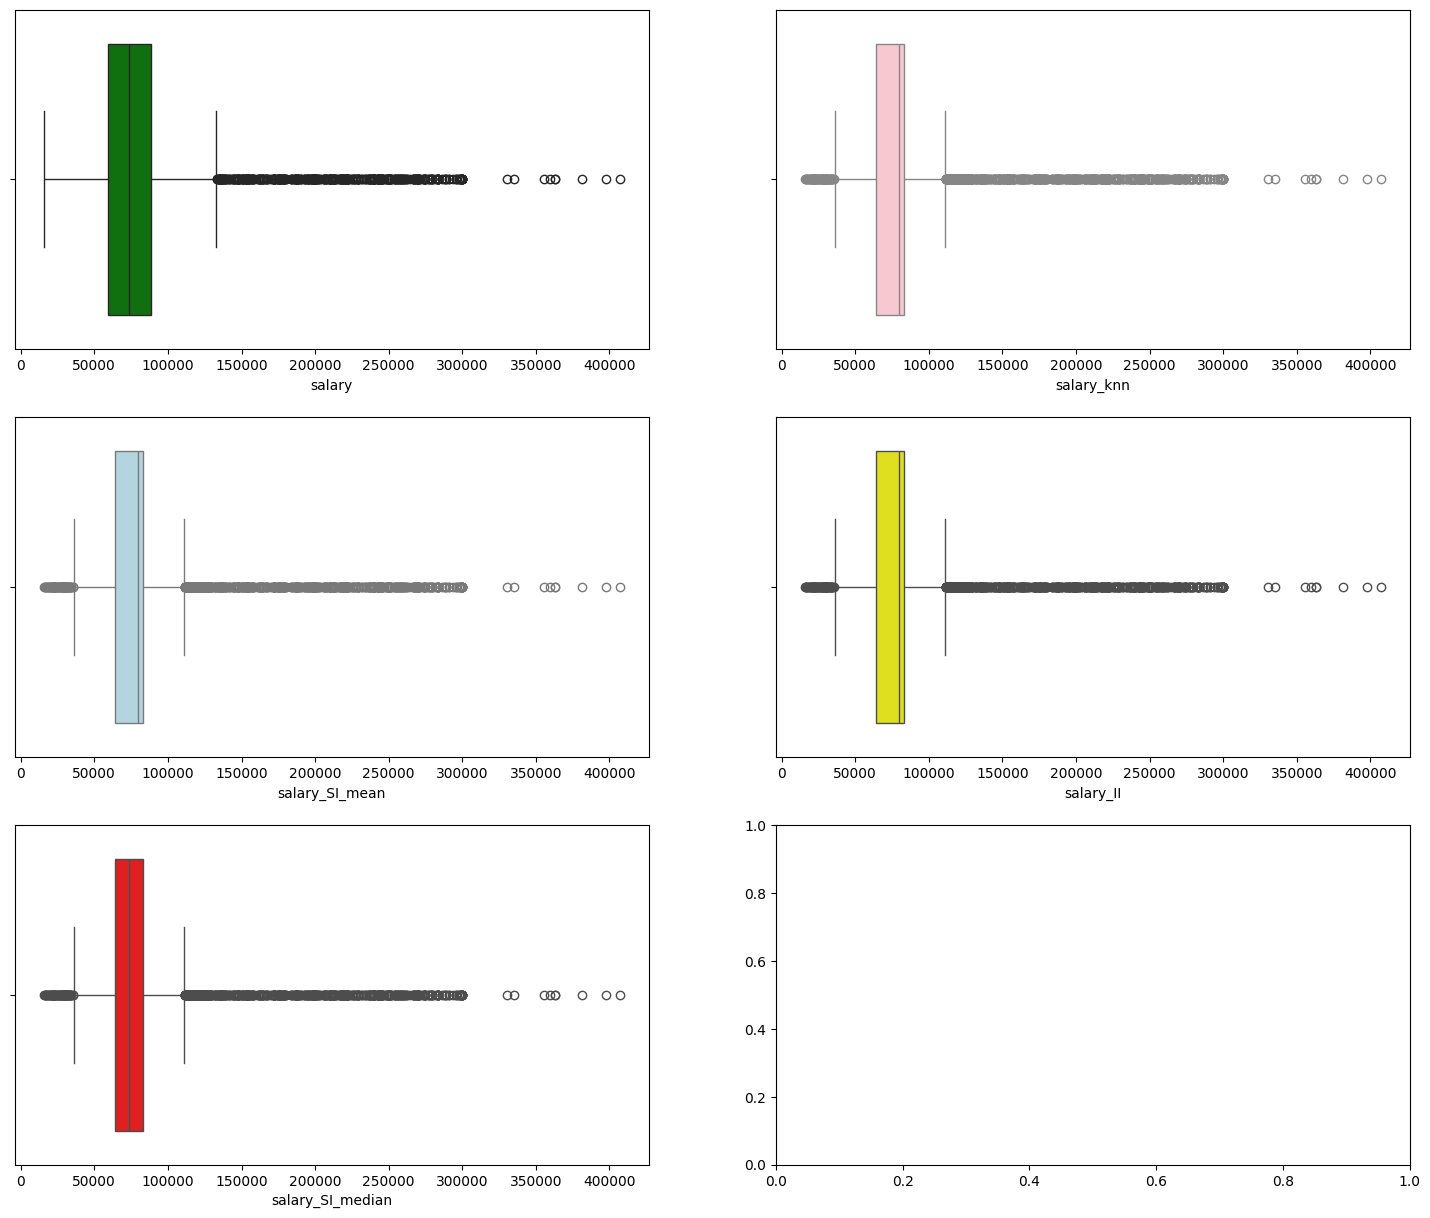

In [34]:
# Compare distributions after imputations, to check which methods impacts the less in the descriptives of this column

fig, axes = plt.subplots(nrows=3, ncols=2,figsize=(18,15))

sns.boxplot(data=df_salary_compare, x="salary", color="green", ax=axes[0,0])
sns.boxplot(data=df_salary_compare, x="salary_SI_mean", color="lightblue", ax=axes[1,0])
sns.boxplot(data=df_salary_compare, x="salary_SI_median", color="red", ax=axes[2,0])
sns.boxplot(data=df_salary_compare, x="salary_knn", color="pink", ax=axes[0,1])
sns.boxplot(data=df_salary_compare, x="salary_II", color="yellow", ax=axes[1,1]);

After comparing these methods, the median still seems the best value to impute.
So now, we can impute the median to the NaN values in the original df_customer "salary" column

In [35]:
imputer_SI_median = SimpleImputer(strategy="median")
df_customer["salary"] = imputer_SI_median.fit_transform(df_customer[["salary"]])

In [36]:
df_customer["salary"].isna().sum() 
# Salary column does not have null values

0

The other 2 columns with null values, cancellation_year and cancellation_month, both with 14670 nulls, seem to indicate that customers whose data are in these rows have not left the rewards program, that is, they are "active" customers.

We can make a few tests to check for incongruencies in the data

In [37]:
df_actives = df_customer.loc[(df_customer["cancellation_year"]=="NaN")&(df_customer["cancellation_month"]!="NaN"),:]
df_actives.head(2)

# There is no row where "cancelation_month" and "cancelation_year" are not NaN together, so this is consistent

,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,CLV,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month


In [39]:
df_customer["cancellation_month"].unique()

array([nan, 'January', 'December', 'April', 'February', 'July',
       'November', 'May', 'June', 'October', 'August', 'September',
       'March'], dtype=object)

In [40]:
df_customer["cancellation_year"].unique()

array([  nan, 2018., 2015., 2017., 2014., 2016., 2013.])

In [41]:
df_customer["enrollment_year"].unique()

array([2016, 2014, 2013, 2012, 2015, 2018, 2017])

In [42]:
# is there any instance where "cancelation_year" is prior to "enrollment_year"?

df_cancel = df_customer.loc[(df_customer["cancellation_year"])<(df_customer["enrollment_year"]),:]
df_cancel

#No, there is no instance of this error

,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,CLV,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month


In this case, it seems a reasonable approach to substitute NaN values in "cancellation_year" and "cancellation_month" for the word "active" since it maintains the meaning of the data, i.e. the customer has not cancelled his/her subscription

In [43]:
df_customer[["cancellation_year", "cancellation_month"]] = df_customer[["cancellation_year", "cancellation_month"]].fillna("active")

In [44]:
df_customer.isna().sum() 
# No null values left in this df

loyalty_number        0
country               0
province              0
city                  0
postal_code           0
gender                0
education             0
salary                0
marital_status        0
loyalty_card          0
CLV                   0
enrollment_type       0
enrollment_year       0
enrollment_month      0
cancellation_year     0
cancellation_month    0
dtype: int64

#### MERGE BOTH DATAFRAMES

We have stablished that df_customer has unique loyalty_numbers, while df_flights has information of many transactions 
for each customer, which we would like to keep.

To do this successfully, the best option would be a "left-merge" with "left" being df_flight_no_dup, so we keep all these
records, even if they do not have an equivalence in the df_customer.

We have to keep in mind though, that customer information will be duplicated for each transaction in the flights dataframe for that customer, but no two rows will be identical

In [103]:
df_complete = pd.merge(left=df_flight_no_dup, right=df_customer, how="left", on="loyalty_number")
df_complete.head()

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,flights_total,CLV,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month,salary_level
0,100018,2017,January,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,126,7919.20,Standard,2016,August,active,active,level_4
1,100102,2017,January,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,73510.0,Single,Nova,125,2887.74,Standard,2013,March,active,active,level_3
2,100140,2017,January,6,0,6,1200,120.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,73510.0,Divorced,Nova,11,2838.07,Standard,2016,July,active,active,level_3
3,100214,2017,January,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,167,4170.57,Standard,2015,August,active,active,level_3
4,100272,2017,January,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,9,6622.05,Standard,2014,January,active,active,level_4


In [297]:
df_complete.shape

(403760, 25)

In [298]:
# The complete dataframe does not have any duplicated records

df_complete.duplicated().sum()

0

In [299]:
# check one customer to make sure the merge was successful and we have kept the intented information
# This should return all transactions of customer with "loyalty_number"==100018

df_100018 = df_complete.loc[(df_complete["loyalty_number"]==100018),:]
df_100018.head()

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,CLV,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
0,100018,2017,January,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,August,active,active
16782,100018,2017,February,2,2,4,1320,132.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,August,active,active
46078,100018,2018,October,6,4,10,3110,311.0,385,31,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,August,active,active
50390,100018,2017,April,4,0,4,924,92.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,August,active,active
67197,100018,2017,May,0,0,0,0,0.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,August,active,active


In [265]:
df_100018.shape

# This particular customer has 24 transactions registered in the complete df, as we wanted to mantain.
# So, merge was successful

(24, 25)

In [300]:
# at this point save a new csv file with all the changes
df_complete.to_csv("customer_flight_loyalty_clean.csv")

In [302]:
df_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 403760 entries, 0 to 403759
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loyalty_number               403760 non-null  int64  
 1   year                         403760 non-null  int64  
 2   month                        403760 non-null  object 
 3   flights_booked               403760 non-null  int64  
 4   flights_with_companions      403760 non-null  int64  
 5   total_flights                403760 non-null  int64  
 6   distance                     403760 non-null  int64  
 7   points_accumulated           403760 non-null  float64
 8   points_redeemed              403760 non-null  int64  
 9   dollar_cost_points_redeemed  403760 non-null  int64  
 10  country                      403760 non-null  object 
 11  province                     403760 non-null  object 
 12  city                         403760 non-null  object 
 13 

#### PHASE 2: Visualization

In [46]:
df_complete = pd.read_csv("customer_flight_loyalty_clean.csv", index_col=0)
df_complete.head(2)

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,CLV,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
0,100018,2017,January,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,August,active,active
1,100102,2017,January,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,73510.0,Single,Nova,2887.74,Standard,2013,March,active,active


Before moving to the specific questions, let's make a few figures to further explore the data 

In [5]:
# Make 2 lists separating numeric and categorical columns

list_var_cat = df_complete[df_complete.columns].select_dtypes(include="object").columns
print(f'List of categorical variables is:\n{list_var_cat}')
print("--------------------")
list_var_num = df_complete[df_complete.columns].select_dtypes(include=np.number).columns
print(f'List of numerical variables is:\n{list_var_num}')

List of categorical variables is:
Index(['month', 'country', 'province', 'city', 'postal_code', 'gender',
       'education', 'marital_status', 'loyalty_card', 'enrollment_type',
       'enrollment_month', 'cancellation_year', 'cancellation_month'],
      dtype='object')
--------------------
List of numerical variables is:
Index(['loyalty_number', 'year', 'flights_booked', 'flights_with_companions',
       'total_flights', 'distance', 'points_accumulated', 'points_redeemed',
       'dollar_cost_points_redeemed', 'salary', 'CLV', 'enrollment_year'],
      dtype='object')


Text(0.5, 1.0, 'Customer Lifetime Value')

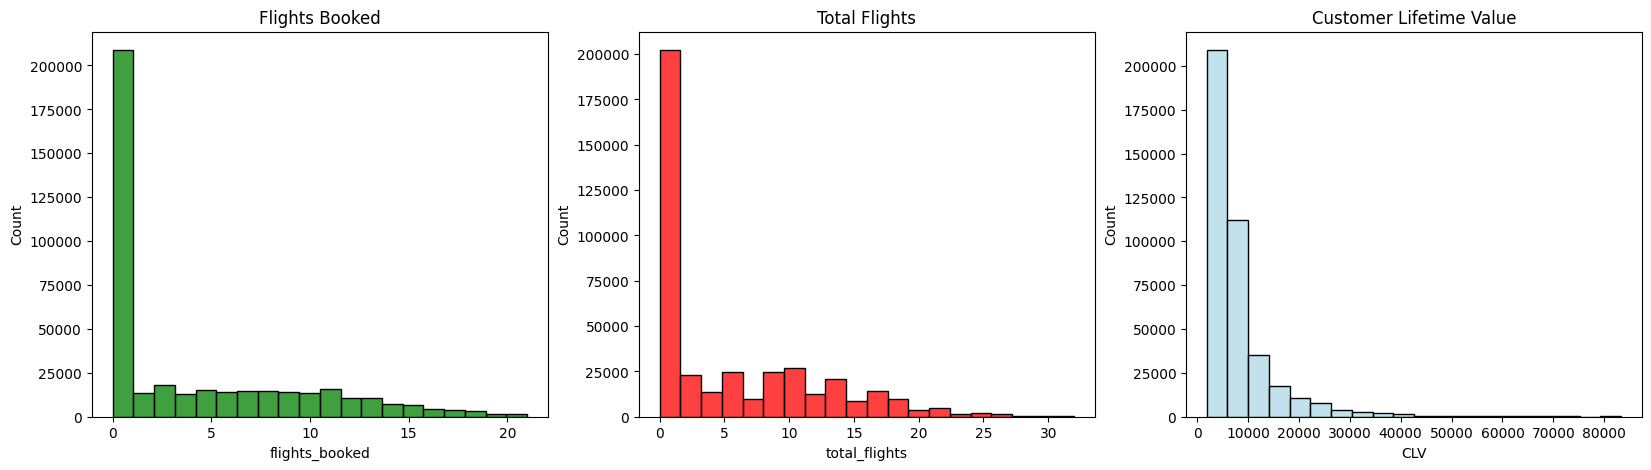

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,5))

sns.histplot(data=df_complete, x= "flights_booked", bins= 20, color="green", ax=axes[0])
sns.histplot(data=df_complete, x= "total_flights", bins= 20, color="red", ax=axes[1])
sns.histplot(data=df_complete, x= "CLV", bins= 20, color="lightblue", ax=axes[2])

axes[0].set_title("Flights Booked")
axes[1].set_title("Total Flights")
axes[2].set_title("Customer Lifetime Value")

In [8]:
# To perform a correlation matrix, let's check if the relations between numerical 
# variables are lineal or not and separate them

from itertools import combinations

combinat_tuples=list(combinations(list_var_num,2)) # we obtain a list of tuples with every combination of any two numeric variables

# Check linearity
lineal_rel=[]
no_lineal_rel =[]

for tuple in combinat_tuples:
    _,p_value1 = kstest(df_complete[tuple[0]],"norm") # for each combination we use the Kolmogorov-Smirnov test to check linearity of 
    _,p_value2 = kstest(df_complete[tuple[1]],"norm") # the relation among these two variables

    # Here H0 assumes that the relation is lineal, so if both p_values are > 0.05, we can discard the H0 and accept H1, 
    # therefore the relation would be not lineal
    if p_value1 > 0.05 and p_value2 > 0.05:  
        lineal_rel.append(tuple)
                   
    else:
        no_lineal_rel.append(tuple)
                    

print(f'The combination of variables that follow linear relations is: {lineal_rel}')
print(f'The combination of variables that follow linear relations is: {no_lineal_rel}')
    


The combination of variables that follow linear relations is: []
The combination of variables that follow linear relations is: [('loyalty_number', 'year'), ('loyalty_number', 'flights_booked'), ('loyalty_number', 'flights_with_companions'), ('loyalty_number', 'total_flights'), ('loyalty_number', 'distance'), ('loyalty_number', 'points_accumulated'), ('loyalty_number', 'points_redeemed'), ('loyalty_number', 'dollar_cost_points_redeemed'), ('loyalty_number', 'salary'), ('loyalty_number', 'CLV'), ('loyalty_number', 'enrollment_year'), ('year', 'flights_booked'), ('year', 'flights_with_companions'), ('year', 'total_flights'), ('year', 'distance'), ('year', 'points_accumulated'), ('year', 'points_redeemed'), ('year', 'dollar_cost_points_redeemed'), ('year', 'salary'), ('year', 'CLV'), ('year', 'enrollment_year'), ('flights_booked', 'flights_with_companions'), ('flights_booked', 'total_flights'), ('flights_booked', 'distance'), ('flights_booked', 'points_accumulated'), ('flights_booked', 'po

All combinations follow non lineal relations, so we have to perform Spearman correlations to obtain the "strength" of each one

In [9]:
# perform a correlation matrix to check all combinations

corr_matrix = df_complete.corr(method="spearman")

round(corr_matrix, 2)

,loyalty_number,year,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,salary,CLV,enrollment_year
loyalty_number,1.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,-0.01,0.01
year,0.00,1.00,0.06,0.03,0.06,0.06,0.08,0.02,0.02,0.00,0.00,0.00
flights_booked,-0.00,0.06,1.00,0.56,0.99,0.90,0.90,0.22,0.22,0.01,-0.00,-0.19
flights_with_companions,-0.00,0.03,0.56,1.00,0.67,0.58,0.58,0.40,0.40,0.00,-0.00,-0.12
total_flights,-0.00,0.06,0.99,0.67,1.00,0.90,0.90,0.26,0.26,0.01,-0.00,-0.19
distance,-0.00,0.06,0.90,0.58,0.90,1.00,1.00,0.24,0.24,0.01,-0.00,-0.19
points_accumulated,-0.00,0.08,0.90,0.58,0.90,1.00,1.00,0.24,0.24,0.01,0.00,-0.19
points_redeemed,0.00,0.02,0.22,0.40,0.26,0.24,0.24,1.00,1.00,0.00,0.00,-0.05
dollar_cost_points_redeemed,0.00,0.02,0.22,0.40,0.26,0.24,0.24,1.00,1.00,0.00,0.00,-0.05
salary,0.00,0.00,0.01,0.00,0.01,0.01,0.01,0.00,0.00,1.00,-0.01,-0.04


<Axes: >

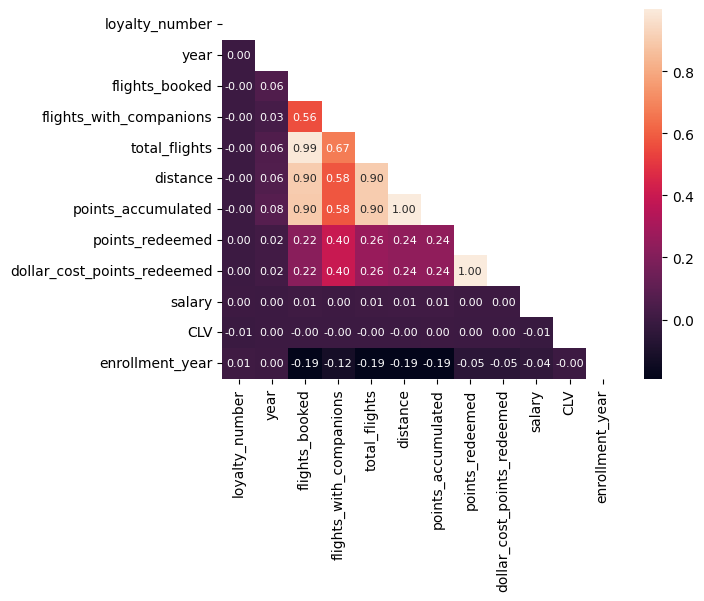

In [10]:
# convert to Heatmap so it is easier to interpret

mask= np.triu(np.ones_like(corr_matrix,dtype=bool))
sns.heatmap(data=corr_matrix, cmap="rocket", annot=True, fmt=".2f", annot_kws={"size": 8}, mask=mask)

INTERPRETATION
- Strong correlations (r > 0.7)
    1. distance and points_accumulated (r=1.0). (To be kept in mind for follow-up analyses)
    2. points_redeemed and dollar_cost_points_redeemed (r=1.0).
    3. flights_booked with:
        - total_flights (r=0.99).
        - points_accumulated (r=0.90)
        - distance (r=0.90)

    These correlations and correlation coeficients make sense and are consistent with how a rewards program would work. In some of these situations, one variable is directly dependent on the other. That is, points_accumulated is directly proportional to distance travelled, and dollar_cost_points_redeemed is directly proportional to points_redeemed

- Moderate correlations (0.3 < r < 0.7):
    1. flights_with_companions is correlated with:
        - total_flights (r=0.67).
        - points_accumulated (r=0.58)
        - distance (r=0.58)
        - flights_booked (r=0.56)
        - dollar_cost_points_redeemed (r=0.40)
        - points_redeemed (r=0.40)
               
    These correlations are also to be expected since flights_with_companions is a subgroup of total_flights.

- Weak correlations (r < 0.3):
    1. points_redeemed (and dollar_cost_points_redeemed, with the same correlation coeficients) with:
        - flights_booked (r=0.22)
        - total_flights (r=0.26)
        - distance (r=0.24)
        - points_accumulated (r=0.24)

All correlations up to here are positive correlations. This means that both variables grow together.

There is a weak negative correlation betweeen "enrollment_year" and "flights_booked" (-0.19), "flights_with_companions" (r=-0.12), "total_flights" (-0.19), "distance" (-0.19), "points_accumulated" (-0.19). This is surprissing since it sugests that these variables are inversely proporcional, i.e., the earlier the enrollment the less activity registered, which is the opposite of what one would expect.

- Variables with no correlations:
    - CLV: this variable, which is somehow a measure of how valuable each customer is to the company, is not correlated to any other variable. It also seems strange that the CLV is not correlated with any of the measures related to the number of flights. One would think that the more a client flights the better his/her CLV.
    - salary: data do not show any correlation of salary with total flights or flights with companions. One might expect that someone with a higher salary might travel more, but this data set does not support that assumption.
    - loyalty number: this is a unique identifier for each customer, there is no reason for it to be correlated to any other variable (unless it was incremental and was somehow associated with enrollment dates).
     

### 1. How are "flights booked" per month distributed over the year?

In [33]:
df_complete["year"].unique()

# There are only entries for 2017 and 2018

array([2017, 2018])

In [34]:
df_complete["month"].unique()

array(['January', 'September', 'February', 'March', 'November', 'April',
       'May', 'July', 'June', 'August', 'October', 'December'],
      dtype=object)

In [35]:
#Select flights booked in 2017
df_flights_booked_2017 = df_complete[(df_complete["year"]==2017)]
df_flights_booked_2017.shape

(201738, 25)

In [36]:
#Select flights booked in 2018
df_flights_booked_2018 = df_complete[(df_complete["year"]==2018)]
df_flights_booked_2018.shape

(202022, 25)

In [37]:
df_flights_booked_2017["month"].value_counts()

November     16821
December     16821
August       16817
October      16817
September    16814
June         16814
July         16812
May          16811
March        16807
April        16807
February     16800
January      16797
Name: month, dtype: int64

In [39]:
# Group the number of flights booked by month for 2017

df_flights_group_2017 = df_flights_booked_2017.groupby("month")["flights_booked"].sum().reset_index()
df_flights_group_2017.head(12)



,month,flights_booked
0,April,55720
1,August,78692
2,December,77650
3,February,47691
4,January,47766
5,July,89288
6,June,80493
7,March,64271
8,May,65279
9,November,56905


In [59]:
# Group the number of flights booked by month for 2018

df_flights_group_2018 = df_flights_booked_2018.groupby("month")["flights_booked"].sum().reset_index()
df_flights_group_2018.head(12)

,month,flights_booked
0,April,56791
1,August,90512
2,December,88397
3,February,48643
4,January,49170
5,July,104143
6,June,92749
7,March,66928
8,May,76891
9,November,65345


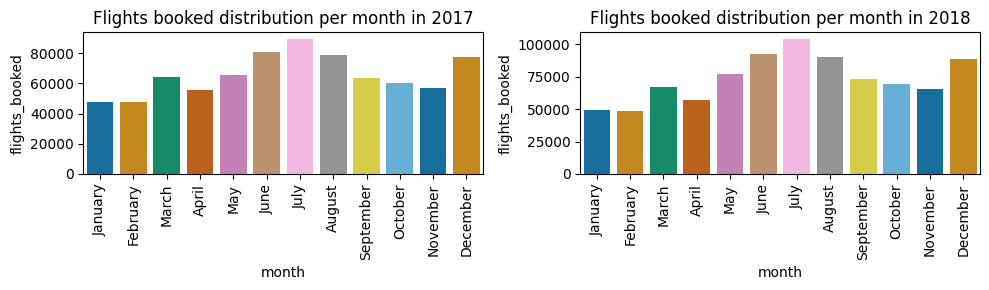

In [74]:
# Plot distribution for 2017 and 2018 side by side

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,3))

sns.barplot(x = "month",
            y = "flights_booked", 
            data = df_flights_group_2017,  
            palette= "colorblind", 
            order=["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"],
            ax=axes[0]
           )

sns.barplot(x = "month",
            y = "flights_booked", 
            data = df_flights_group_2018,  
            palette= "colorblind",           
            order=["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"],
            ax=axes[1]
           )

axes[0].set_xticks(axes[0].get_xticks())  # 
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90) # equivalent to plt.xtick(rotate=90) for subplots

axes[1].set_xticks(axes[1].get_xticks())  # 
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)

axes[0].set_title("Flights booked distribution per month in 2017")
axes[1].set_title("Flights booked distribution per month in 2018")


plt.tight_layout() # adjust figures so there is no overlap


Flight distribution per month, for both years, is consistent with the usual vacation/holidays periods. June, July and August are the busiest months followed by December, May and March.
January and February are the months with less activity.  
Also, there was more travel in 2018 than in 2017, with 202,022 and 201,738 flight, respectively.

### 2. Is there any relation between "distance" and "points_accumulated"?

As was shown above there is a very strong correlation between "distance" and "points_accumulated" (r[Spearman]=1.0)

But, let's explore a bit more

Text(0.5, 1.0, 'Correlation plot between distance and points accumulated')

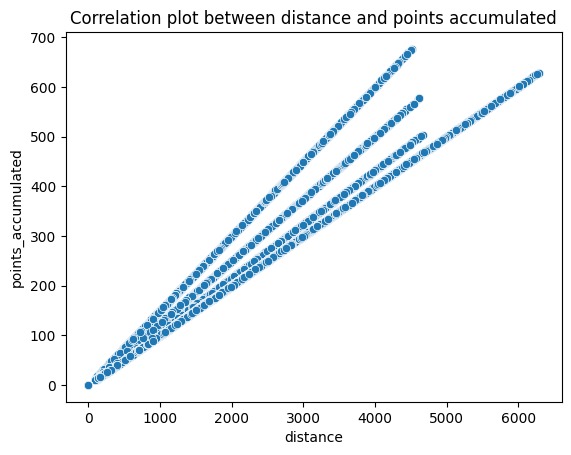

In [13]:
# correlation between "distance" and "points_accumulated"

sns.scatterplot(data= df_complete, x="distance", y="points_accumulated")

plt.title("Correlation plot between distance and points accumulated")

This scatter plot seems to indicate that there is more than one relation between "distance" and "points_accumulated" and not all customers earn points in the same way. It may be the result of the different loyalty cards. Let's test it

In [26]:
df_complete["loyalty_card"].value_counts()
# There are 3 types of loyalty cards Star, Nova and Aurora

Star      183745
Nova      136883
Aurora     83132
Name: loyalty_card, dtype: int64

In [28]:
# Create dfs separating each type of card
# Star customers
df_star = df_complete[df_complete["loyalty_card"]=="Star"]

# Nova customers
df_nova = df_complete[df_complete["loyalty_card"]=="Nova"]

# Aurora customers
df_aurora = df_complete[df_complete["loyalty_card"]=="Aurora"]


Text(0.5, 1.0, 'Customers with Aurora loyalty_card')

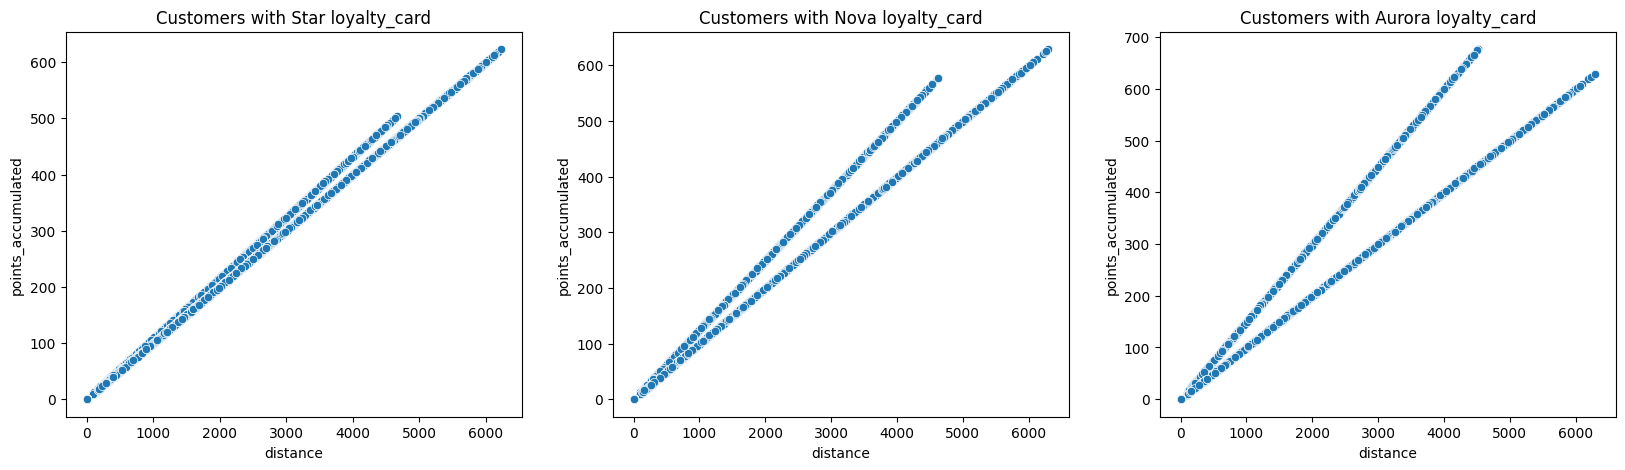

In [29]:
# scatterplos for customers with the 3 loyalty cards
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,5))

sns.scatterplot(data= df_star, x="distance", y="points_accumulated", ax=axes[0])
sns.scatterplot(data= df_nova, x="distance", y="points_accumulated", ax=axes[1])
sns.scatterplot(data= df_aurora, x="distance", y="points_accumulated", ax=axes[2])

axes[0].set_title("Customers with Star loyalty_card")
axes[1].set_title("Customers with Nova loyalty_card")
axes[2].set_title("Customers with Aurora loyalty_card")

This type of plot is not helping, let's add a 3rd variable, in this case the type of loyalty card, with the hue parameter to the original plot

Text(0.5, 1.0, 'Correlation plot between distance and points accumulated according to the loyalty card type')

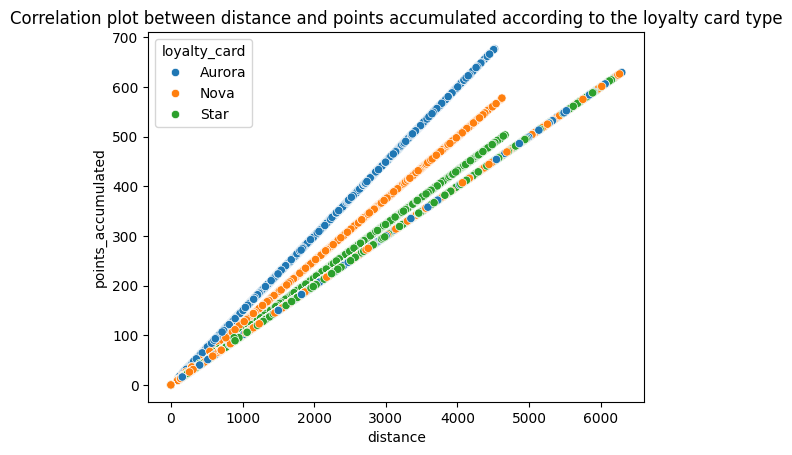

In [18]:
# We can a add a 3rd variable, in this case the type of loyalty card, with the hue parameter

sns.scatterplot(data= df_complete, x="distance", y="points_accumulated", hue="loyalty_card")

plt.title("Correlation plot between distance and points accumulated according to the loyalty card type")


So, this gives us the right information. 

Differences are, in the most part, the result of the different loyalty cards. Aurora members earn points faster than the other 2 types of membership, followed by Nova customers and lastly Star members.

Another variable has some type of influence, since the lowest line showes dots of the three colors. We could test a 4th variable adding it to the style parameter

Text(0.5, 1.0, 'Correlation plot between distance and points accumulated according to the loyalty card and enrollment types')

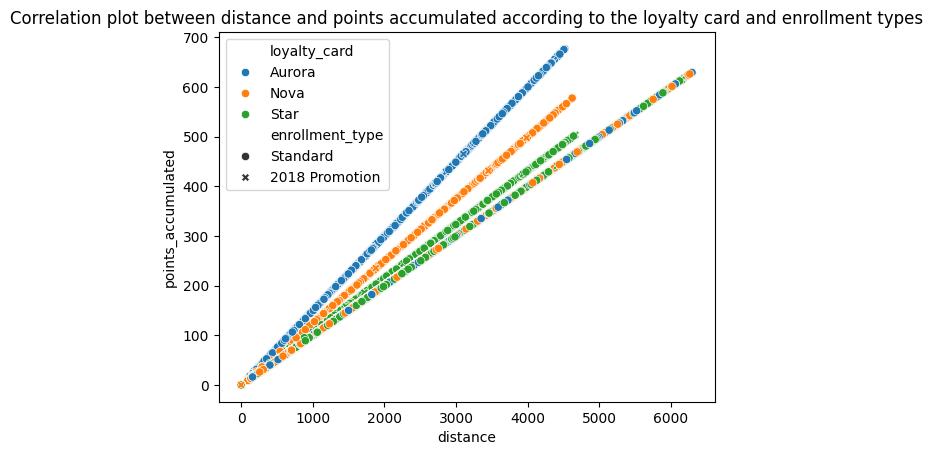

In [19]:
# Testing a 4th variable in style, to check if the color distribution improves

# 1. enrollment_type

sns.scatterplot(data= df_complete, x="distance", y="points_accumulated", hue="loyalty_card", style="enrollment_type")

plt.title("Correlation plot between distance and points accumulated according to the loyalty card and enrollment types")



It seems there are no crosses in the lowest line, so this might be it. Let's do a last test to see if we can get a conclusion.

 We could separate clients by enrollment type first and repeat the analyses for both group separately

In [30]:
# create 2 data frames for the 2 enrollment types

df_enr_std =df_complete[df_complete["enrollment_type"]=="Standard"]
df_enr_prom =df_complete[df_complete["enrollment_type"]=="2018 Promotion"]

<Axes: title={'center': 'Correlation plot between distance and points accumulated according to the loyalty card type for Standard enrollment type'}, xlabel='distance', ylabel='points_accumulated'>

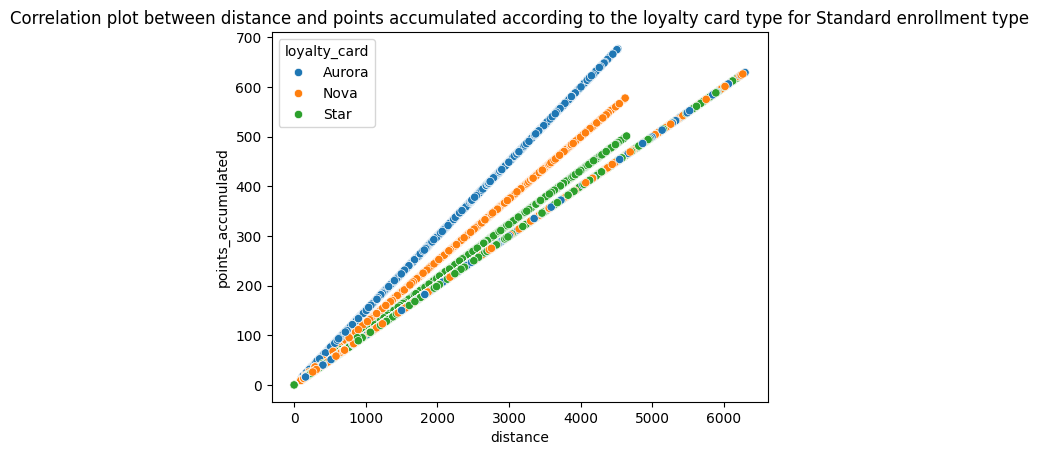

In [31]:
# Enrollment type = Standard
plt.title("Correlation plot between distance and points accumulated according to the loyalty card type for Standard enrollment type")
sns.scatterplot(data= df_enr_std, x="distance", y="points_accumulated", hue="loyalty_card")

NameError: name 'df_enr_prom' is not defined

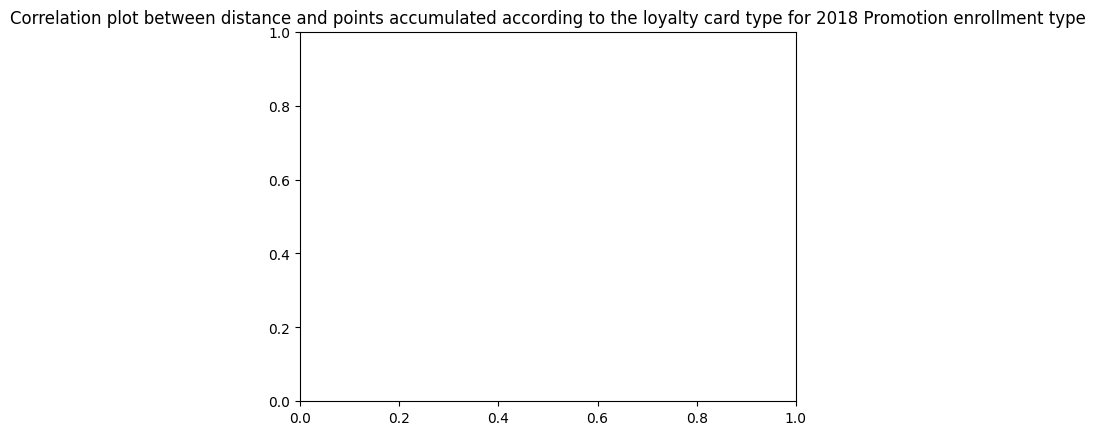

In [99]:
# Enrollment type = 2018 Promotion

plt.title("Correlation plot between distance and points accumulated according to the loyalty card type for 2018 Promotion enrollment type")
sns.scatterplot(data= df_enr_prom, x="distance", y="points_accumulated", hue="loyalty_card");


So, at this point, I cannot find the parameter that separates colors in the lowest line. So, either I am overlooking something or the information is not in the data provided

### 3. How are customers distributed by State or province?

In [75]:
# We already know all customers are in Canada. Let's check again the unique values for "province"

df_complete["province"].value_counts()

Ontario                 130258
British Columbia        106442
Quebec                   79573
Alberta                  23360
Manitoba                 15900
New Brunswick            15352
Nova Scotia              12507
Saskatchewan              9861
Newfoundland              6244
Yukon                     2679
Prince Edward Island      1584
Name: province, dtype: int64

In [77]:
# let's group data by province and count loyalty numbers to know how many customers there are in each province
# But, heads up! remember that the complete DF has many repeated loyalty numbers. For this we need the original df_customer 

df_province_groups= df_customer.groupby("province")["loyalty_number"].count().reset_index()
df_province_groups

,province,loyalty_number
0,Alberta,969
1,British Columbia,4409
2,Manitoba,658
3,New Brunswick,636
4,Newfoundland,258
5,Nova Scotia,518
6,Ontario,5404
7,Prince Edward Island,66
8,Quebec,3300
9,Saskatchewan,409


In [80]:
# sort them by increasing number of members

df_province_groups_sorted = df_province_groups.sort_values("loyalty_number", ascending=False).reset_index()
df_province_groups_sorted.drop(labels="index", axis=1, inplace= True)
round(df_province_groups_sorted,1)


,province,loyalty_number
0,Ontario,5404
1,British Columbia,4409
2,Quebec,3300
3,Alberta,969
4,Manitoba,658
5,New Brunswick,636
6,Nova Scotia,518
7,Saskatchewan,409
8,Newfoundland,258
9,Yukon,110


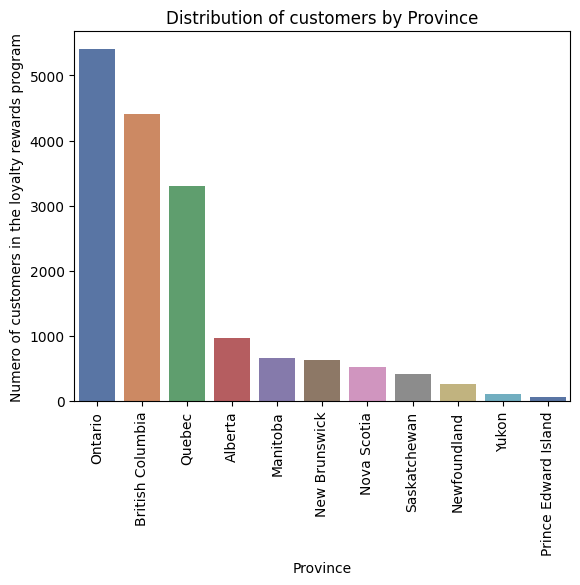

In [104]:
# plot them

sns.barplot(x = "province",
            y = "loyalty_number", 
            data = df_province_groups_sorted,  
            palette= "deep"            
           );

plt.title("Distribution of customers by Province")
plt.xlabel("Province")
plt.ylabel("Numero of customers in the loyalty rewards program")
plt.xticks(rotation = 90);



In [96]:
# We could investigate if this is somehow related to mean salaries in each province

#relation between salaries and provinces
df_province_salary= df_complete.groupby("province")["salary"].mean().reset_index()

df_province_salary_sorted = df_province_salary.sort_values("salary", ascending=False).reset_index()
df_province_salary_sorted.drop(labels="index", axis=1, inplace= True)
round(df_province_salary_sorted,1)

,province,salary
0,New Brunswick,79936.0
1,Yukon,79737.7
2,Prince Edward Island,78791.5
3,Quebec,78425.2
4,British Columbia,78321.0
5,Ontario,77824.1
6,Saskatchewan,76694.6
7,Nova Scotia,76679.9
8,Manitoba,76618.4
9,Alberta,76168.5


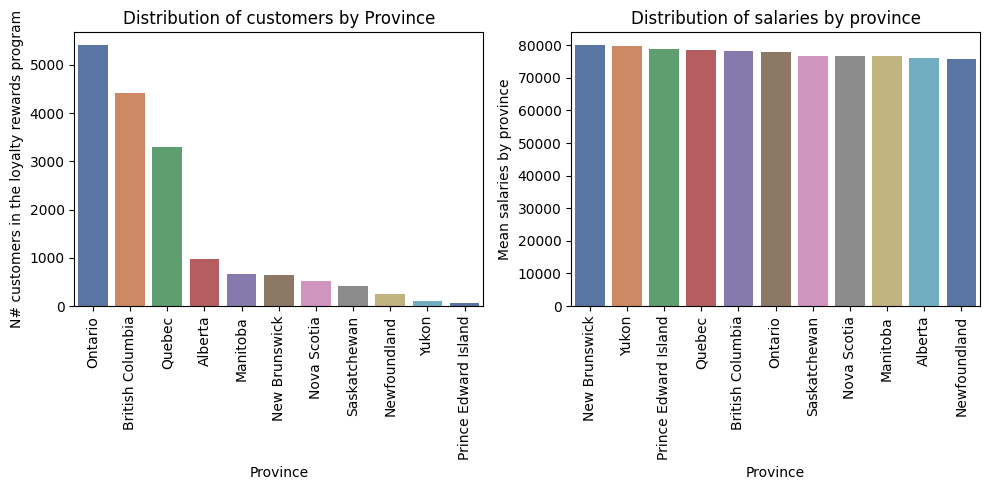

In [106]:
# plot them side by side

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

# plot for provinces
sns.barplot(x = "province",
            y = "loyalty_number", 
            data = df_province_groups_sorted,  
            palette= "deep",
            ax=axes[0]            
           )

axes[0].set_title("Distribution of customers by Province")
axes[0].set_xlabel("Province")
axes[0].set_ylabel("N# customers in the loyalty rewards program")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90); # notation to rotate labels in axes when having subplots

# plot for salaries

sns.barplot(x = "province",
            y = "salary", 
            data = df_province_salary_sorted,  
            palette= "deep",
            ax=axes[1]            
           )

axes[1].set_title("Distribution of salaries by province")
axes[1].set_xlabel("Province")
axes[1].set_ylabel("Mean salaries by province")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90);

plt.tight_layout()

Interpretation: 

As for the distribution of customers per province, there is a tendency for customer number to follow province population numbers. The most populated provinces in Canada are Ontario, Quebec, British Columbia, Alberta and Manitoba, followed by Saskatchewan, where the tendency is lost.

I checked if the mean salaries followed a similar trend, but it is not the case

### 4. How does the mean salary compare amongst the different education levels? 

In [33]:
# Create a subDF grouping by "education"

df_education_groups= df_complete.groupby("education")["salary"].agg(["mean", "std"]).reset_index()
round(df_education_groups.head(),1)

,education,mean,std
0,Bachelor,72669.0,16576.6
1,College,73510.0,0.0
2,Doctor,178403.7,70380.1
3,High School or Below,61176.4,12106.6
4,Master,103734.5,17518.5


Adding a yerr parameter in the sns plot converting the "std" values to a 1D array of the correct length to feed it to the plot:

```Python
array_std = df_education_groups['std'].values
array_std.shape)
```

gives me an error: 

"'yerr' (shape: (5,)) must be a scalar or a 1D or (2, n) array-like whose shape matches 'y' (shape: (1,))" 

that I haven't been able to fix, so I am opting for using plt error bars

In [63]:
# Order the education levels to plot them in increasing salary order

df_education_groups_sorted = df_education_groups.sort_values("mean").reset_index()
df_education_groups_sorted.drop(labels="index", axis=1, inplace= True)
round(df_education_groups_sorted,1)

,education,mean,std
0,High School or Below,61176.4,12106.6
1,Bachelor,72669.0,16576.6
2,College,73510.0,0.0
3,Master,103734.5,17518.5
4,Doctor,178403.7,70380.1


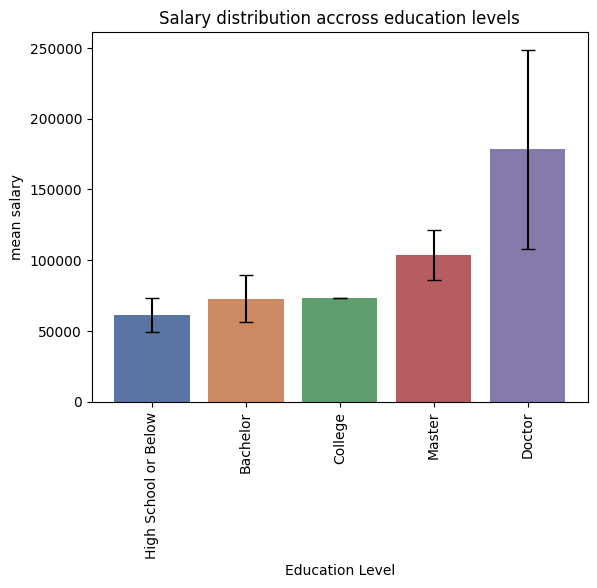

In [130]:

sns.barplot(x = "education",
            y = "mean", 
            data = df_education_groups_sorted,  
            palette= "deep",
            #yerr= array_std, 
            ci=None,
           )

plt.errorbar(
    x=range(len(df_education_groups_sorted)),  # X positions (indices of the bars)
    y=df_education_groups_sorted["mean"],  # Y values (mean salaries)
    yerr=df_education_groups_sorted["std"],  # Error values (standard deviation)
    fmt='none',  # No line connecting the error bars
    capsize=5,   # Add caps to the error bars
    color='black')

plt.title("Salary distribution accross education levels")
plt.ylabel("mean salary")
plt.xlabel("Education Level")
plt.xticks(rotation = 90);

Interpretation: Mean salary increases with education, i.e., people with higher education tends to have better salaries. 

If we wanted to see if the differences are significant, the next steps would be to check normality of the distribution of salaries and check homogeneity of variances, and then perform an Analysis of Variance (ANOVA, one way) and then a post hoc analysis, such as the Bonferroni correction to evaluate differences amongst groups

### 5. What is the proportion of customers with each of the different loyalty cards?

In [114]:
# Percentage of customers for each loyalty cards

df_percentage_card= df_customer["loyalty_card"].value_counts(normalize=True).reset_index()
df_percentage_card["loyalty_card"] = (df_percentage_card["loyalty_card"])*100
round(df_percentage_card,1)

,index,loyalty_card
0,Star,45.6
1,Nova,33.9
2,Aurora,20.5


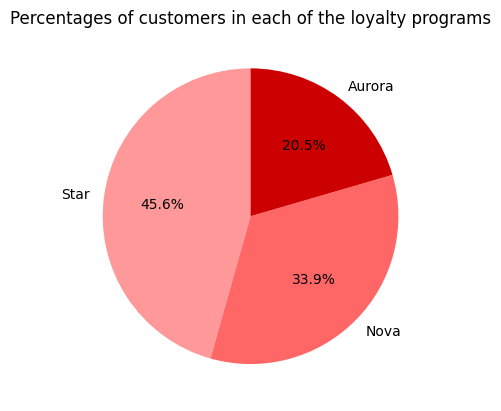

In [126]:
# we will do a pieplot

colors = ['#FF9999', '#FF6666', '#CC0000']

plt.pie("loyalty_card", labels= "index",
        data = df_percentage_card, 
        autopct=  '%1.1f%%', 
        colors = colors, 
        textprops={'fontsize': 10}, 
        startangle=90);

plt.title("Percentages of customers in each of the loyalty programs");

As can be seen in the plot, 45.6% of the customers have a Star loyalty card, 33.9% a Nova carda and only 20.5% are in the Aurora tier. Presumably, obtaining an Aurora card is more difficult, but they earn loyalty points faster.

### 6. How are customers distributed according to their marital status and gender

In [100]:
# Let's construct a contingency table to look at these combinations

conting_table = pd.crosstab(df_customer["marital_status"],df_customer["gender"], normalize=True)*100
round(conting_table,1)

gender,Female,Male
marital_status,,
Divorced,7.6,7.5
Married,29.1,29.1
Single,13.6,13.2


This table shows the percentages of customers in each ccombination of the 2 variables. For example, 29.1% of women are married, and 13.6 are single, while only 7.6 are divorced. With respect to males, the percentages are very similar, with 29.1%, 13.2% and 7.5% in each category, respectively.

We can also put it in a figure for better visualization

Text(0, 0.5, 'Percentages (%)')

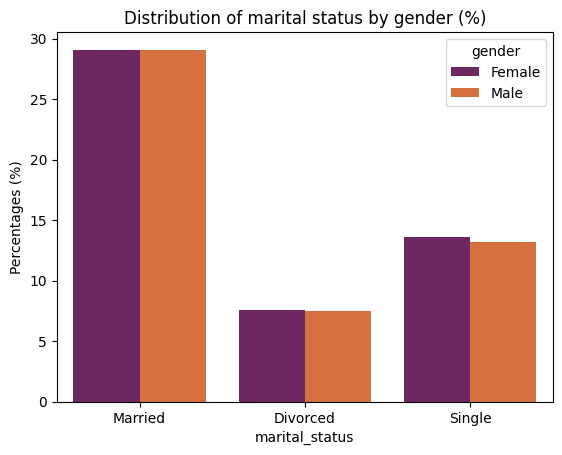

In [135]:
# We can use a countplot

sns.countplot(x = "marital_status", 
              data = df_customer, 
              palette = "inferno",
              stat="percent", 
              hue = "gender")

plt.title("Distribution of marital status by gender (%)")
plt.ylabel("Percentages (%)")


The same conclusion can be reached by analysing the plot. Differences in marital status for the 2 genders are minimal.

Let's check if there are any differences among genders that might be interesting to analyses.
We could start with salaries, but since salary is a numberic variable, we need to convert it to a categorical variable by clasifying it in several ranges.

First, let's get a histogram of salaries.

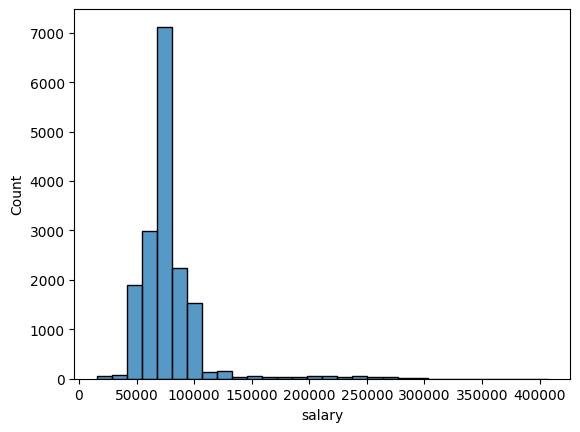

In [63]:
sns.histplot(data=df_customer, x="salary", bins=30);

To make a countplot we need two categorical variables, so we will categorize salaries into several levels to investigate if there are differences in the percentages of men and women in each level.

In [55]:
# function to categorize salary ranges
def salary_level (salary):
    if 15000<salary and salary<25000:
        res = "level_1"
    elif salary>25001 and salary<50000:
        res = "level_2"
    elif salary>50001 and salary<75000:
        res ="level_3"
    elif salary>75001 and salary<100000:
        res ="level_4"
    elif salary>100001 and salary<150000:
        res ="level_5"
    elif salary>150001 and salary<250000:
        res ="level_6"
    elif salary>250001 and salary<400000:
        res ="level_7"
    else:
        res = "level_8"

    return res




In [57]:
# add a column "salary_level" by calling the function

df_customer["salary_level"] = df_customer["salary"].apply(salary_level)
df_customer.head(2)

,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,CLV,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month,salary_level
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,February,active,active,level_4
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,73510.0,Divorced,Star,3839.61,Standard,2016,March,active,active,level_3


In [65]:
# make a contingency table to explore differences

conting_table_s = pd.crosstab(df_customer["salary_level"],df_customer["gender"], normalize=True)*100
round(conting_table_s,2)


gender,Female,Male
salary_level,,
level_1,0.10,0.08
level_2,2.63,2.61
level_3,29.66,29.93
level_4,13.18,12.71
level_5,3.28,2.98
level_6,1.00,1.04
level_7,0.39,0.39
level_8,0.01,0.01


In [67]:
salary_mean_gender = df_customer.groupby("gender")["salary"].agg(["mean", "std"])
round(salary_mean_gender,1)

,mean,std
gender,,
Female,77928.3,29704.4
Male,77918.8,30489.7


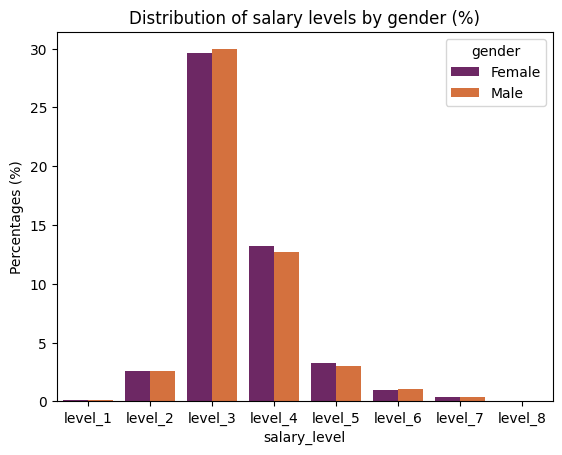

In [62]:
sns.countplot(x = "salary_level", 
              data = df_customer, 
              palette = "inferno",
              stat="percent", 
              hue = "gender",
              order=["level_1","level_2","level_3","level_4","level_5","level_6","level_7","level_8"])

plt.title("Distribution of salary levels by gender (%)")
plt.ylabel("Percentages (%)");

Interpretation: Percentages are very similar between genders, numbers do not suggest significant differences by gender. To really check for significant differences we would need to do t-test.

In [70]:
#divide data in two subDFs for men and women

df_men = df_customer[df_customer["gender"]=="Male"]
df_women = df_customer[df_customer["gender"]=="Female"]

In [74]:
# check if data follow a normal distribution

p_value_m = shapiro(df_men["salary"]).pvalue
p_value_w = shapiro(df_women["salary"]).pvalue
if p_value_m < 0.05 and p_value_w < 0.05:
    print("Data are not normaly distributed")
elif p_value_m < 0.05 and p_value_w > 0.05:
    print("Salaries in df_men are not normaly distributed")
elif p_value_m > 0.05 and p_value_w < 0.05:
    print("Salaries in df_women are not normaly distributed")
else:
    print("Salaries are normaly distributed")


Data are not normaly distributed


In [84]:
# check variance homogeneity

statistic, p_value = stats.levene(df_men["salary"], df_women["salary"], center="mean")
alpha = 0.05
if p_value < alpha:
    print("Variances are homogeneous")
else:
    print("Variances are not homogeneous")

Variances are not homogeneous


After performing normality test and an equal variances test, we conclude that neither of these conditions apply to these data, so we should perform a non parametric test to check for significant differences

In [81]:
# Perform non parametric Mann-Whitney test

statistic, p_value = stats.mannwhitneyu(df_men["salary"], df_women["salary"], alternative="two-sided")

print(f"The p_value is {round(p_value, 3)}")
alpha= 0.05
if p_value < alpha:
    print("Mean salaries are significantly different for women and men")
else: 
    print("Mean salaries are not significantly different for women and men")

The p_value is 0.441
Mean salaries are not significantly different for women and men


Other data we can explore:

### BONUS Phase 3. Evaluation of differences in flights booked per education level

Are there significant differences in the number of flights_booked for the different education levels?

1. Data preparation: Filter data to select only "flights_booked" and "education"

2. Descriptive analyses: group data by education level and obtain basic descriptive statistics (such as mean and standard deviation) of flights_book for each group

3. Statistical test. Perform an hypothesis test to determine if there is a significant difference between the number of fligths_book for each education level

1. Data preparation

In [92]:
# Calculate the total overall number of flights per customer
flights_total = df_complete.groupby("loyalty_number")["flights_booked"].sum().reset_index()
flights_total.head()

,loyalty_number,flights_booked
0,100018,157
1,100102,173
2,100140,152
3,100214,79
4,100272,127


In [86]:
flights_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   loyalty_number  16737 non-null  int64
 1   flights_booked  16737 non-null  int64
dtypes: int64(2)
memory usage: 261.6 KB


Now, I'd like to include this new column to the df_customer for each customer, so we can do a merge on "loyalty_number"

In [109]:
df_customer_2 = pd.merge(left=df_customer, right=flights_total, on="loyalty_number")
df_customer_2.head()

,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,CLV,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month,salary_level,flights_booked
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,February,active,active,level_4,132
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,73510.0,Divorced,Star,3839.61,Standard,2016,March,active,active,level_3,190
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,73510.0,Single,Star,3839.75,Standard,2014,July,2018.0,January,level_3,66
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,73510.0,Single,Star,3839.75,Standard,2013,February,active,active,level_3,123
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,October,active,active,level_5,132


In [111]:
df_customer_2.rename(columns={"flights_booked":"flights_total"}, inplace =True)

In [112]:
df_customer_2.head(2)

,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,CLV,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month,salary_level,flights_total
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,February,active,active,level_4,132
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,73510.0,Divorced,Star,3839.61,Standard,2016,March,active,active,level_3,190


This column "flights_total" is not to be confussed with "total_flights" in the df_flights or df_complete Dataframes. 
This column contains the "grand total" of all the flights booked by each customer in all the data base. While "total_flights" only refers to total in each row 

In [114]:
# prepare the specific df for the analyses, that only contains "flights_total" and "education" columns

df_bonus = df_customer_2[["flights_total", "education"]]
df_bonus.shape

(16737, 2)

2. Descriptive analyses

In [115]:

df_bonus_groups = df_bonus.groupby("education")["flights_total"].agg(["count", "mean", "median","std"]).reset_index()
round(df_bonus_groups,2)

,education,count,mean,median,std
0,Bachelor,10475,99.10,113.0,54.23
1,College,4238,100.61,113.0,54.21
2,Doctor,734,100.87,115.0,55.93
3,High School or Below,782,101.01,115.0,54.87
4,Master,508,101.60,113.0,54.02


To be able to perform a Hypothesis test to determine the existence of significant variables (t-test) we will further classify education levels in "higher_education" and "lower_education"

higher_education will include: Bachelor, Master and Doctor and,

lower_education: High School or Below and College

In [119]:
# function to categorize salary ranges
def education_level (education):
    if education == "Bachelor" or education == "Doctor" or education == "Master":
        res = "Higher_education"
    else:
        res = "Lower_education"
    return res


In [120]:
# add a column "salary_level" by calling the function

df_bonus["education_level"] = df_customer_2["education"].apply(education_level)
df_bonus.head(2)

,flights_total,education,education_level
0,132,Bachelor,Higher_education
1,190,College,Lower_education


In [122]:
df_bonus["education_level"].value_counts()

Higher_education    11717
Lower_education      5020
Name: education_level, dtype: int64

3. Statistical Test:

- Null hypothesis: number of flights are significantly different amongst the different education levels

- Alternative hypothesis: number of flights are not significantly different amongst the different education levels

Steps:
- Check if the distributions are normally distributed
- Check if the variances are homogeneous
- If the first condition is met, perform t-test for equal_var=False
- If none are met, perform non parametric tests: Mann-Whitney test.

if the p_value from the statistic test is < 0.05 we can accept H0 to be valid, and there is a significant difference between groups. On the contrary, if p_value > 0.05, H0 is invalid and H1 prevails, there is no significant difference among groups

In [125]:
# make 2 separate dfs for both groups

df_high = df_bonus[df_bonus["education_level"]=="Higher_education"]
df_low = df_bonus[df_bonus["education_level"]=="Lower_education"]


,flights_total,education,education_level
1,190,College,Lower_education
2,66,College,Lower_education
3,123,College,Lower_education
6,143,College,Lower_education
13,204,College,Lower_education


In [126]:
# 1. check normality of the distributions of flights in both DFs

p_value_h = shapiro(df_high["flights_total"]).pvalue

alpha = 0.05
if p_value_h < alpha:
    print("Data are not normally distributed")
else:
    print("Data are normally distributed")

Data are not normally distributed


In [127]:
# Also for df_low
p_value_l = shapiro(df_low["flights_total"]).pvalue

alpha = 0.05
if p_value_l < alpha:
    print("Data are not normally distributed")
else:
    print("Data are normally distributed")

Data are not normally distributed


In [128]:
# 2. Check homocedasticity

statistic, p_value_hl = stats.levene(df_high["flights_total"], df_low["flights_total"], center="mean")

alpha = 0.05
if p_value < alpha:
    print("Variances are homogeneous")
else:
    print("Variances are not homogeneous")

Variances are not homogeneous


In this case also, after performing normality test and an equal variances test, we conclude that neither of these conditions apply to these data, so we should perform a non parametric test to check for significant differences

In [130]:
# Perform non parametric Mann-Whitney test

_, p_value_mw = stats.mannwhitneyu(df_high["flights_total"], df_low["flights_total"], alternative="two-sided")

print(f"The p_value is {round(p_value_mw, 3)}")
alpha = 0.05
if p_value < alpha:
    print("There is a significant difference in the number of flights for customers with higher education and those with lower education")
else: 
    print("There is not a significant difference in the number of flights for customers with higher education and those with lower education")

The p_value is 0.273
There is not a significant difference in the number of flights for customers with higher education and those with lower education


The conclusion after this test, is that there are no significant differences between the total number of flights among the different education groups